In [78]:
# Importing required packages and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sns.set(rc = {'figure.figsize' : (12,5)})
iris = pd.read_csv('iris.data')
iris = iris.drop(columns = 'Unnamed: 0')

# I. Iris Dataset

### Question 1
There are three species of flowers in the dataset. The sepal length-width combination of one of
the species is quite distinct from that of the other two species. Make an appropriate visualization
plot to find out the distinct species.

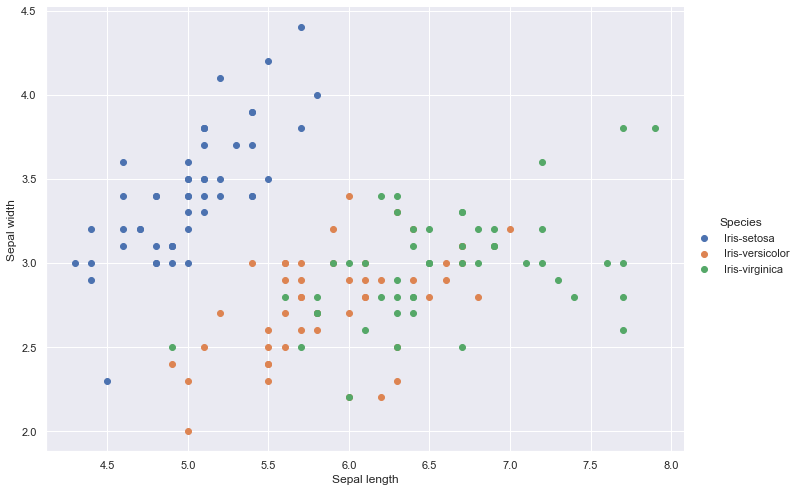

In [50]:
# Creating the facet wrapped scatter plot
i = sns.FacetGrid(iris, 
                  hue = 'Species', 
                  height = 7, 
                  aspect = 1.4)
i.map(plt.scatter, 
      'Sepal length', 
      'Sepal width')
i.add_legend()

The Iris-setosa species is the most distinct species out of the three in the iris dataset.

### Question 2
Make a plot that shows the distribution of petal length for each of the three species. It should
show median, 25th and 75th percentile values and outliers. Based on the plot, answer the
following questions:

a. Which species does not have any outlying values of petal length?

b. Which species always has a larger petal length than setosa?

c. Which species seems to have the lowest variance of petal length?

<AxesSubplot:xlabel='Petal length', ylabel='Species'>

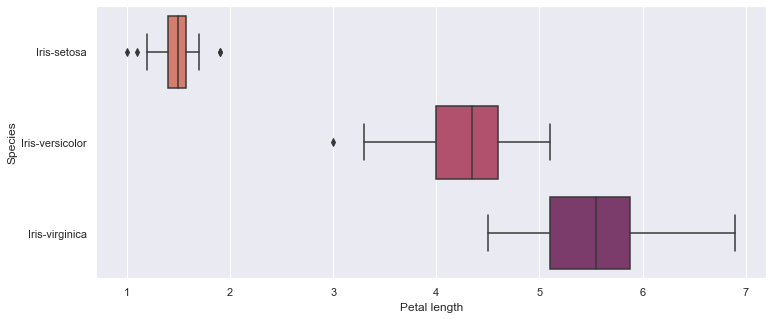

In [47]:
# Creating the boxplot
sns.boxplot(data = iris, y = "Species", x = "Petal length", palette = "flare")

1. The only species with no outlying values of petal length is the virginica species.

2. Both the versicolor and the virginica species always have larger petal lengths than the setosa species.

3. The setosa species seems to have the lowest variance of petal lengths (evidenced by the thin boxplot).

### Question 3
Let us call Sepal length, Sepal width, Petal length, Petal width as iris descriptors. We wish to
visualize the distribution of iris descriptors for each of the three species. Create a 2x2 grid of
four subplots – one for each iris descriptor. In each subplot, make the density plots of the iris
descriptor with respect to each of the three species (i.e., three density plots in each subplot). 

a. For which iris descriptor do the densities of two of the species have the highest overlap?
Also identify those two species.

b. Do the mean values of the iris descriptor corresponding to each of the two species, found
in (a), differ significantly? Justify your answer with a T-test. Assume a confidence level
of 95%.

c. If you are given iris flowers of each of the three species, which species will be the easiest
to identify? Justify your answer.

<AxesSubplot:xlabel='Petal width', ylabel='Density'>

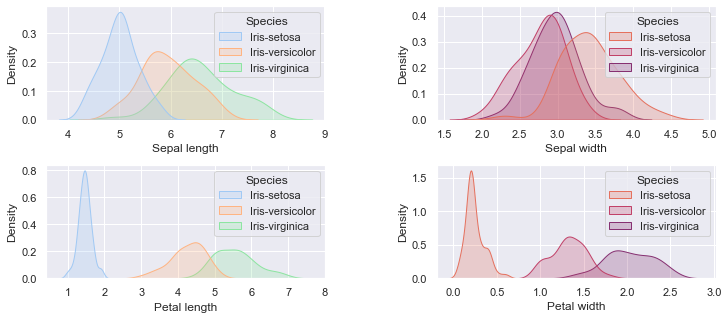

In [53]:
# Setting up the subplots
fig, axes = plt.subplots(2,2,figsize=(12,5))
plt.subplots_adjust(wspace=0.4, hspace = 0.4)

# Defining the variables
x1 = iris['Sepal length']
x2 = iris['Sepal width']
x3 = iris['Petal length']
x4 = iris['Petal width']
y = iris['Species']

# Creating the density plots
sns.kdeplot(ax = axes[0,0], x = x1, hue = y, fill = True, palette = "pastel")
sns.kdeplot(ax = axes[0,1], x = x2, hue = y, fill = True, palette = "flare")
sns.kdeplot(ax = axes[1,0], x = x3, hue = y, fill = True, palette = "pastel")
sns.kdeplot(ax = axes[1,1], x = x4, hue = y, fill = True, palette = "flare")

In [85]:
versicolor = iris[iris['Species'] == "Iris-versicolor"]
virginica = iris[iris['Species'] == "Iris-virginica"]

stats.ttest_ind(versicolor['Sepal width'], virginica['Sepal width'])

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

a. For the sepal width iris descriptor, the virginica and the versicolor species overlap the most out of any iris descriptor.

b. Since the p-value is 0.0018191004238894803 which is less than 0.05, the difference is significant.

c. I believe that the setosa species would be the easiest out of the three species to identify because both the petal width and petal length is far smaller than the other two species. So theoretically, if you had a petal from each of these three species, the smallest petal will likely be a setosa petal.

### Question 4
Make a pairwise plot of all the columns in the dataset, where data points of each species have a
distinct color, and the diagonal contains density plots.

Based on the plots:

a. Which iris descriptor seems to distinguish the three species the most?

b. Which iris descriptor seems to distinguish the three species the least?

c. Which species has the least correlation among its sepal and petal descriptors? Justify
your answer.

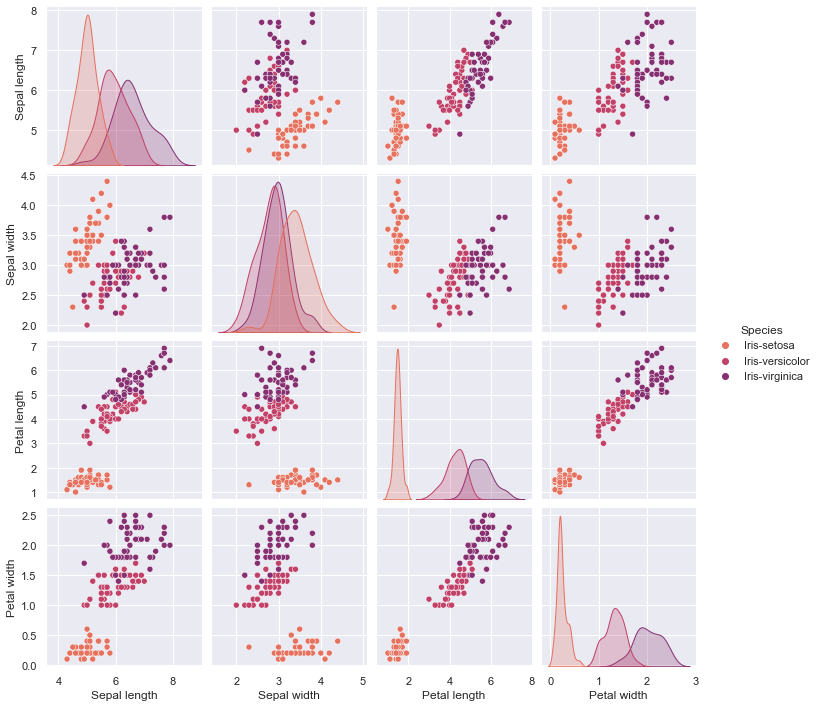

In [48]:
# Creating the pairplot
sns.pairplot(iris, hue = 'Species', palette = "flare")

a. To me, the petal width and petal length iris desciptors are the easiest to distinguish the three species the most.

b. Sepal length appears to distinguish the three species the least, but sepal width is also hard to distinguish the species.

c. The setosa species has the least correlation among its sepal and petal desciptors. This is evidenced by the almost vertical trending lines of the setosa data points across the sepal and petal descriptors.

# II. Movies Dataset

### Question 1
You would like to make a movie that gets a high IMDB rating. Make boxplots to compare the
distribution of IMDB ratings of movies based on their genres.

Based on the plot:

a. Mention a reason that you would choose to make a ‘documentary’. 

b. Mention a reason that you would choose to make an ‘Action/Adventure’ movie. 

c. For which genres, at least 75% of movies have an IMDB rating greater than 6?

In [7]:
# Loading the movies dataset, dropping the unusable column, and the rows with at least one missing value
movies = pd.read_csv("Movies.csv")
movies = movies.drop(columns = "Unnamed: 0")
movies = movies.dropna()

<AxesSubplot:xlabel='IMDB Rating', ylabel='Major Genre'>

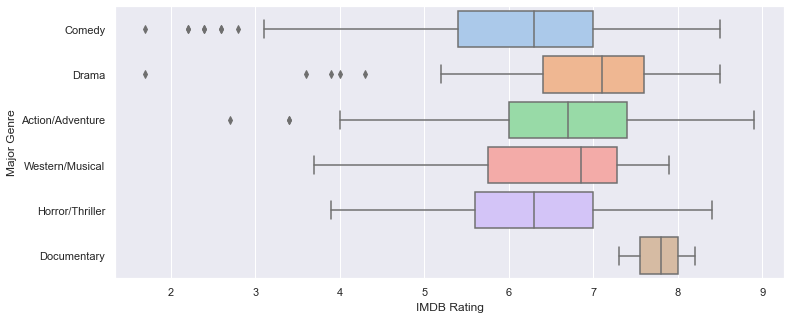

In [55]:
# Creating the boxplot
sns.boxplot(data = movies, x = "IMDB Rating", y = "Major Genre", palette = "pastel")

a. A reason to make a 'documentary' is that, based on the boxplot I created, documentaries objectively have the smallest range of IMDB ratings, with no outliers, and high rating. So, based on this boxplot, a documentary is guarenteed to score a 7 or above.

b. A reason to make a 'Action/Adventure' movie is that despite having a large range, the genre has the highest max to the range. This means that it would be possible for the next Action/Adventure movie to score the closest to a 9, a promise that none of the genre can offer.

c. The documentary, action/adventure, and drama genres all have at least 75% of movies with an IMDB rating greater than 6, with the end of the Action/Adventure 25% marker just touching the 6 rating.

### Question 2a

Compute the ROI for each movie (as defined in assignment 1). Identify if there are any
outliers with respect to ROI. Remove the most extreme outlier.

In [56]:
# Creating the ROI variable
movies['ROI'] = (movies['Worldwide Gross'] - movies['Production Budget'])/movies['Production Budget']

<AxesSubplot:xlabel='ROI'>

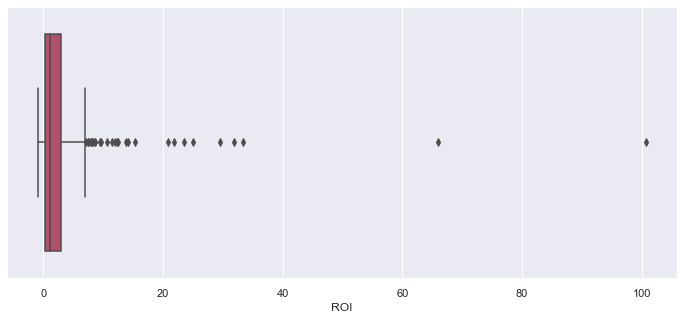

In [57]:
# Dropping the most extreme outlier
movies_roi = movies[movies['ROI'] < movies['ROI'].max()]

# Creating the boxplot
sns.boxplot(data = movies_roi, x = "ROI", palette = "flare")

In [12]:
# Locating the movie with the max ROI
movies.iloc[movies['ROI'].argmax(),:]

Title                     Paranormal Activity
US Gross                          107918810.0
Worldwide Gross                   193770453.0
US DVD Sales                       14051496.0
Production Budget                     15000.0
Release Date                      Sep 25 2009
MPAA Rating                                 R
Source                    Original Screenplay
Major Genre                   Horror/Thriller
Creative Type                         Fiction
Rotten Tomatoes Rating                   82.0
IMDB Rating                               6.7
IMDB Votes                            53455.0
Rotten_tomatoes_scaled                    8.2
diff                               85851643.0
ROI                                12917.0302
Name: 2474, dtype: object

### Question 2b
Draw a barplot showing the mean ROI (as defined in assignment 1) and its 95% confidence interval, for different genre types.

<AxesSubplot:xlabel='Major Genre', ylabel='ROI'>

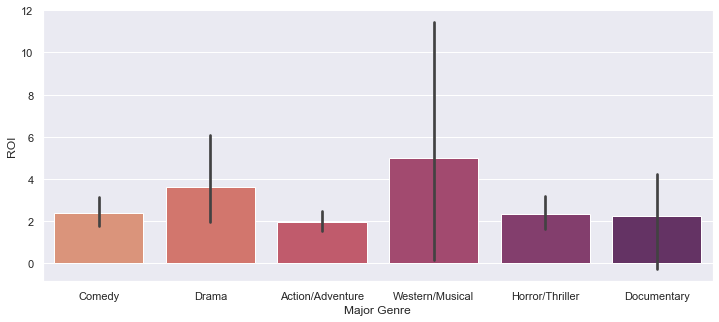

In [58]:
# Creating the barplot with confidence intervals
sns.barplot(data = movies_roi, y = "ROI", x ="Major Genre", ci = 95, palette = "flare")

### Question 2c

You are a risk-taker. You would like to choose a genre that may lead to the highest
possible ROI. Which genre will you choose? Justify your answer. 

As a risk-taker, I would choose the Western/Musical genre because regardless of the huge confidence interval range, the top of this range far surpasses all of the other genres by far. This means that a Western/Musical movie has a possibility to lead to a huge ROI, somethign the other genres seem to not offer.

### Question 2d

You like to play it safe. You would like to have a high ROI, while simultaneously minimizing the risk of getting a low ROI. Which genre will you choose? Justify your answer. 

To play it safe, I would likely choose the Drama genre because while it doesn't have the a max that far surpasses the other genres like the Western/Musical genre, it still has a larger max ROI than the other genres without it's minimum going below those of the other genres.

### Question 2e

You would like to discard the genre that has the possibility of incurring a loss. Which
genre will you discard? Justify your answer.

I would discard the documentary genre because it was the only genre whose confidence interval went BELOW the bottom of the bar plot. Since ROI is the revenue, this means any value with a negative ROI is a monetary loss.

### Question 2f

Split the barplot created in part (b) by the ‘Creative type’ column to create two barplots side-by-side in a single plot – one showing mean ROI based on genre for non-fiction movies, and the other showing the same for fiction movies.

<AxesSubplot:xlabel='Major Genre', ylabel='ROI'>

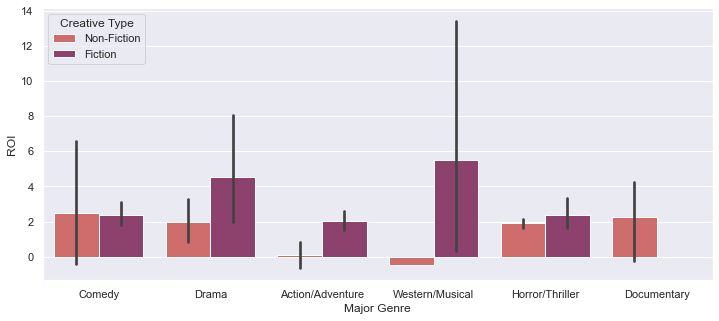

In [59]:
# Creating the barplot with confidence intervals
sns.barplot(data = movies_roi, y = "ROI", x ="Major Genre", ci = 95, hue = "Creative Type", palette = "flare")

### Question 2g

Which creative type / genre combination(s) may have negative mean ROI, based on the plot in (f)?

Based on my plot in f, the non-fiction Action/Adventure genre, the non-fiction Documentary genre, and the non-fiction comedy genre may have a negative mean ROI. Also to note, the non-fiction Western/Musical genre may also have a negative mean ROI, but no confidence interval appears for this barplot because there is only one observation in this specific category.

## Question 3

### Question 3a

Compute profit for each movie as the difference between worldwide gross and production budget.

In [15]:
# Creating the profit variable
movies['Profit'] = movies['Worldwide Gross'] - movies['Production Budget']

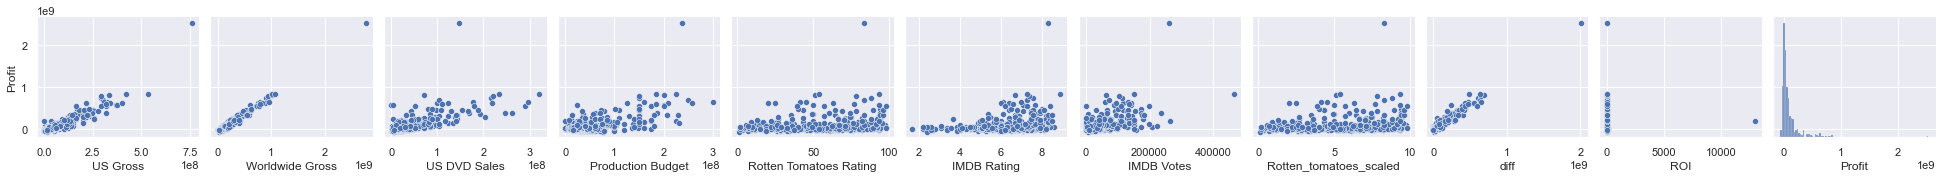

In [61]:
# Creating the profit pairplot
sns.pairplot(movies, y_vars = "Profit")

### Question 3b

Identify any four variables that are positively correlated with profit. Draw the scatterplots along with the trendline showing the positive correlation for each of the four variables in a 2 x 2 grid.

<AxesSubplot:xlabel='diff', ylabel='Profit'>

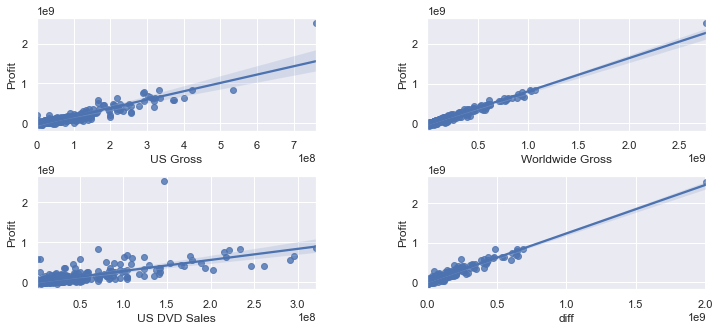

In [62]:
# Setting up the subplots
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Defining the variables
x1 = movies['US Gross']
x2 = movies['Worldwide Gross']
x3 = movies['US DVD Sales']
x4 = movies['diff']
y = movies['Profit']

# Creating the scatterplots with trend lines
sns.regplot(ax = axes[0,0], x = x1, y = y)
sns.regplot(ax = axes[0,1], x = x2, y = y)
sns.regplot(ax = axes[1,0], x = x3, y = y)
sns.regplot(ax = axes[1,1], x = x4, y = y)

The four variables I identified as positively correlated with profit were US Gross, Worldwide Gross, US DVD Sales, and diff.

## Question 4

### Question 4a

Scale the rotten tomatoes ratings appropriately to compare it with the IMDB ratings.

This scaling already happened.

### Question 4b
Draw an appropriate plot comparing the distributions of IMDB ratings and the scaled rotten tomatoes rating. Which rating seems to distinguish more among the movies?

<AxesSubplot:xlabel='IMDB Rating', ylabel='Count'>

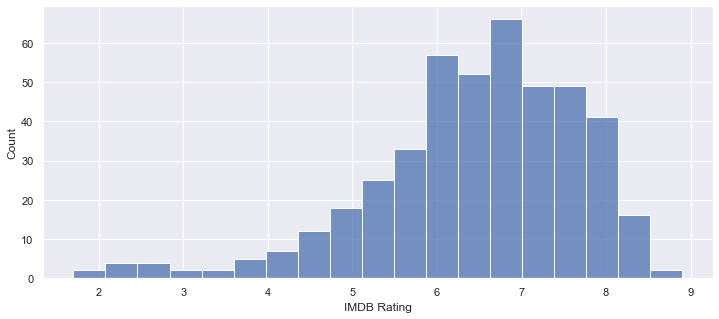

In [18]:
# Creating the IMDB rating histogram
x = movies['IMDB Rating']
sns.histplot(x = x)

<AxesSubplot:xlabel='Rotten_tomatoes_scaled', ylabel='Count'>

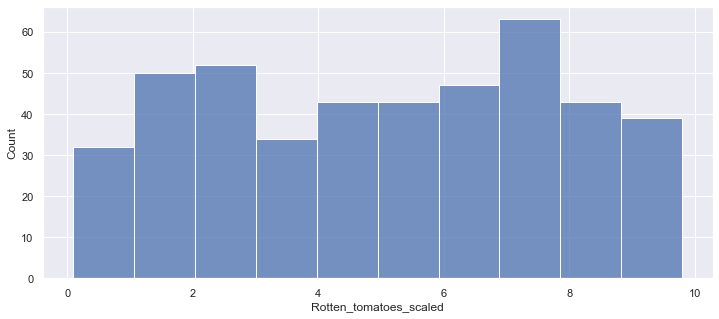

In [19]:
# Creating the Rotten_tomatoes_scaled histogram
x1 = movies['Rotten_tomatoes_scaled']
sns.histplot(x = x1)

The rotten tomatoes scaled appears to distinguish more between the movies.

### Question 4c

The distribution for which rating is bi-modal? What is the approximate rating at the modes?

The Rotten_tomatoes_rating is the bi-modal rating. The approximate rating of the modes is about 2.5 and 7.5.

## Question 5

### Question 5a

Draw a histogram and kernel density estimate of the IMDB ratings in the same plot.

<AxesSubplot:xlabel='IMDB Rating', ylabel='Count'>

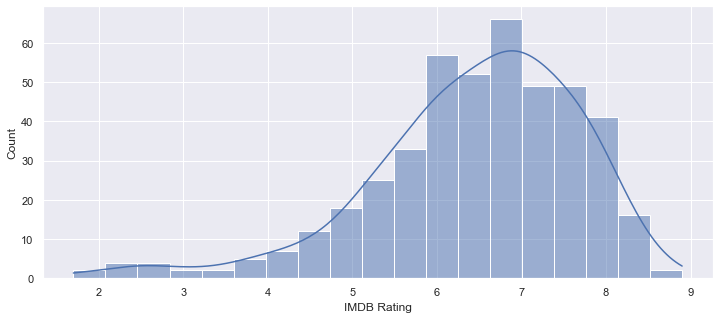

In [64]:
# Creating the IMDB rating histogram with kde
sns.histplot(data = movies, x = "IMDB Rating", kde = True)

### Question 5b

Do the majority of the movies have a higher than mean IMDB rating? Justify your answer based on the plot.

Because the histogram and kernel density estimate of the IMDB rating are skewed left (tail appears on the left of the plot), this means that the median is  larger than the mean. This then means that yes, the majority of movies DO have a higher than mean IMDB rating.

# III. American Gourds

In [21]:
# Loading the gourdsData dataset and dropping the unneeded column
gourds = pd.read_csv("GourdData.csv")
gourds = gourds.drop(columns = "Unnamed: 0")

# Question 1

Find the top five pumpkin-producing states in the year 2020. Say we're interested in those five states' pumpkin production from 2016-2020. Assuming that the amount of pumpkin per acre harvested is constant, produce an appropriate seaborn visualization to meet this goal. Briefly provide at least two observations about your visualization and the US pumpkin market.

In [23]:
# Finding the top five pumpkin-producing states in the year 2020
gourds_2020 = gourds[gourds['Year'] == 2020].sort_values(by = ['PUMPKINS - ACRES HARVESTED'], ascending = False).head()

In [26]:
# Isolating those top five producing states
gourds_top = gourds[gourds['Year'] >= 2016]
gourds_top = gourds_top.query('State in ["ILLINOIS", "PENNSYLVANIA", "INDIANA", "NEW YORK", "MICHIGAN"]')

Text(0.5, 1.0, 'Acres of Pumpkins Harvested by Year')

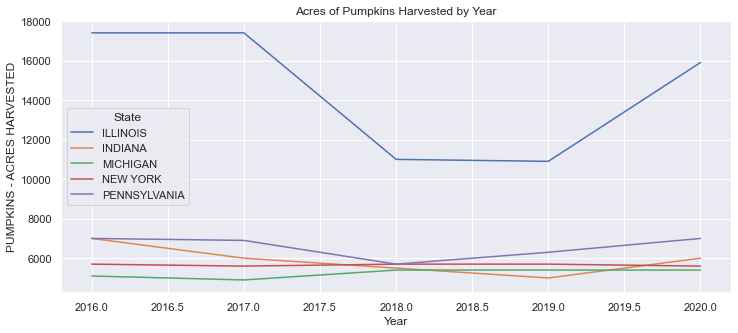

In [65]:
# Creating the line plot over time
sns.lineplot(data = gourds_top, x = "Year", y = "PUMPKINS - ACRES HARVESTED", hue = "State").set_title("Acres of Pumpkins Harvested by Year")

An observation I made is that Illinois, regardless of the year, far surpasses all other states in terms of pumpkin production. The second observation I made is that the other four states, Indiana, Michigan, New York, and Pennsylvania are all closely related in terms of pumpkin harvests. A third observation I made was that right around 2018, there was a noticable drop in pumpkins harvested, regardless of state.

## Question 2

Suppose we're considering Pacific states California, Oregon, and Washington. For each state, we want to know the mean number of acres of pumpkins planted across 2000-2020. We're also interested in looking at each state's median number of acres of pumpkins planted in the same time horizon. Produce one appropriate visualization to meet both goals. Briefly provide at least one observation about this visualization and the US pumpkin market.

In [ ]:
# Isolating the pacifc states
gourds_pacific = gourds.query('State in ["CALIFORNIA", "OREGON", "WASHINGTON"]')`

Text(0.5, 1.0, 'The Distribution of Acres of Pumpkins Planted Across California, Oregon, and Washington')

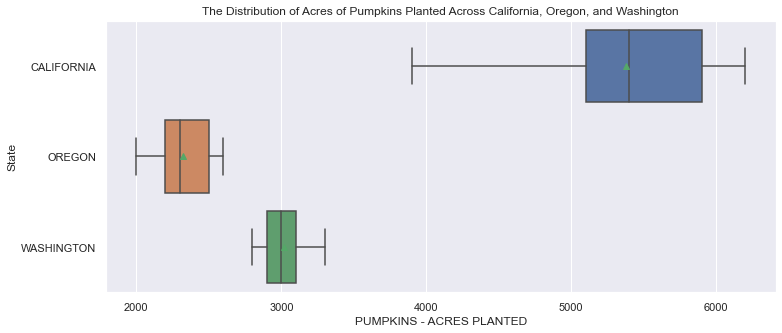

In [87]:
# Creating the boxplots of the pacfic states
sns.boxplot(data = gourds_pacific, y = "State", x = "PUMPKINS - ACRES PLANTED", showmeans = True).set_title("The Distribution of Acres of Pumpkins Planted Across California, Oregon, and Washington")

An observation I made was that despite having the largest range, California far surpassed the other two states in terms of how many acres of pumpkins were planted in this 20 year time period. This of course makes sense since California has more land than both Oregon and Washington combined -- just more space to plant pumpkins.

## Question 3

Consider the acres of pumpkins planted and acres of pumpkins harvested in Illinois from 2000-2020. Are there any trends in the number of acres planted and harvested over time? Produce a visualization to answer this question, along with a short written answer.

In [31]:
# Isolating Illinois
gourds_il = gourds.query('State in ["ILLINOIS"]')

Text(0.5, 1.0, 'Acres of Pumpkins Harvested by Acres of Pumpkins Planted')

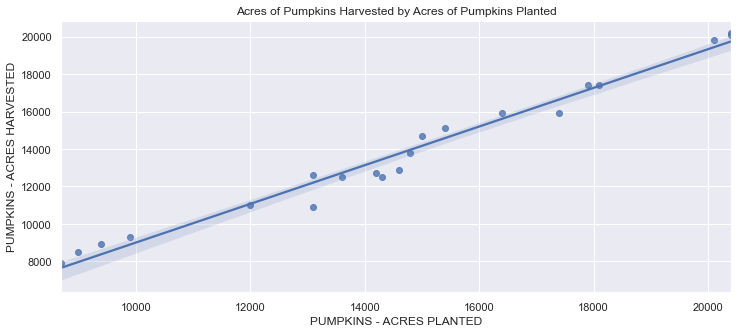

In [66]:
# Creating the scatterplot of Illinois + the trend line
sns.regplot(data = gourds_il, x = "PUMPKINS - ACRES PLANTED", y = "PUMPKINS - ACRES HARVESTED").set_title("Acres of Pumpkins Harvested by Acres of Pumpkins Planted")

There seems to be a clear positive correlation between the number of acres of pumpkin planted and the number of pumpkin acres harvested. A linear trend line seems to fit well.

## Question 4

Suppose we're curious about the relationship between acres of squash planted, acres of squash harvested, and price received in $/cwd (the price per 100lbs of squash) across all states and years. Produce a single visualization to demonstrate the relationship between the three variables. Briefly describe what you learn from your visualization. Does there seem to be a relationship between price and acres of squash harvested?

Text(0.5, 1.0, 'Squash Acres Planted by Squashed Price Recieved')

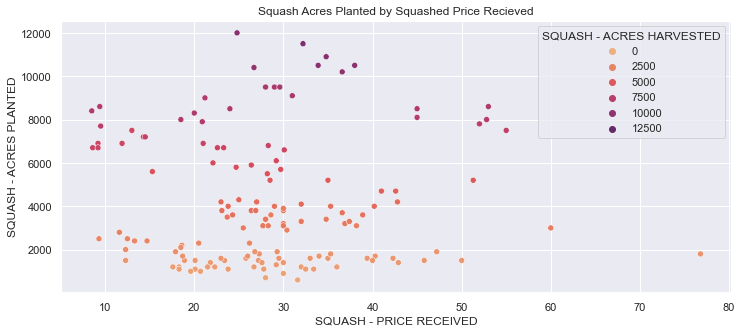

In [77]:
# Creating the scatterplot
sns.scatterplot(data = gourds, x = "SQUASH - PRICE RECEIVED", y = "SQUASH - ACRES PLANTED", hue = "SQUASH - ACRES HARVESTED", palette = "flare").set_title("Squash Acres Planted by Squashed Price Recieved")

From what I can see above, I do not see a relationship between price and the acres of squash harvested at all. As the price increases, the acres harvested does not increase as well, that trend line would be closer to vertical!